In [1]:
# Dependencies and setup
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import chardet
import gmaps

# Import API key
from api_keys import g_key

# Extract

# Extract

### U.S. Census 2010-2019

In [2]:
# U.S. Census 2010-2019
censusDataReadMeURL = "https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-total.html"

# This is where the census data .CSV lives locally:
censusDataFilepath = "Resources/co-est2019-alldata_exp.csv"

print(f"{censusDataFilepath} is {round(os.path.getsize(censusDataFilepath)/1024/1024, 2)} megabytes (MB).\nMore info here:\n{censusDataReadMeURL}")

# Read CSV into censusData DataFrame
censusData = pd.read_csv(censusDataFilepath, encoding = "iso-8859-1")
censusData

Resources/co-est2019-alldata_exp.csv is 0.14 megabytes (MB).
More info here:
https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-total.html


,FIPS,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,POPESTIMATE2019
0,1001,1,1,Alabama,Autauga County,54571,55869
1,1003,1,3,Alabama,Baldwin County,182265,223234
2,1005,1,5,Alabama,Barbour County,27457,24686
3,1007,1,7,Alabama,Bibb County,22915,22394
4,1009,1,9,Alabama,Blount County,57322,57826
...,...,...,...,...,...,...,...
3137,56037,56,37,Wyoming,Sweetwater County,43806,42343
3138,56039,56,39,Wyoming,Teton County,21294,23464
3139,56041,56,41,Wyoming,Uinta County,21118,20226
3140,56043,56,43,Wyoming,Washakie County,8533,7805


# Extract

### COVID-19 Cases & Deaths

In [3]:
# COVID-19 cases and deaths
caseDataReadMeURL = "https://github.com/nytimes/covid-19-data/blob/master/README.md"

# This is where the .CSV lives locally:
caseDataFilepath = "Resources/us-counties.csv"

print(f"The file at {caseDataFilepath} is {round(os.path.getsize(caseDataFilepath)/1024/1024, 2)} MB.\nMore info here:\n{caseDataReadMeURL}")

# Read CSV into caseData DataFrame
caseData = pd.read_csv(caseDataFilepath, encoding = "UTF-8")
caseData

The file at Resources/us-counties.csv is 38.21 MB.
More info here:
https://github.com/nytimes/covid-19-data/blob/master/README.md


,date,county,state,fips,cases,deaths
0,1/21/2020,Snohomish,Washington,53061.0,1,0
1,1/22/2020,Snohomish,Washington,53061.0,1,0
2,1/23/2020,Snohomish,Washington,53061.0,1,0
3,1/24/2020,Cook,Illinois,17031.0,1,0
4,1/24/2020,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
987297,2/8/2021,Sweetwater,Wyoming,56037.0,3559,33
987298,2/8/2021,Teton,Wyoming,56039.0,3257,7
987299,2/8/2021,Uinta,Wyoming,56041.0,1988,12
987300,2/8/2021,Washakie,Wyoming,56043.0,869,26


# Extract

### U.S. Landmass Data (by County)

In [4]:
# Landmass (and thence population density)
landMassDataReadMeURL = "https://hub.arcgis.com/datasets/48f9af87daa241c4b267c5931ad3b226_0/data?orderBy=FIPS"

# This is where the landmass data .CSV lives locally:
landMassDataFilepath = "Resources/counties-by-land-area.csv"

print(f"{landMassDataFilepath} is {round(os.path.getsize(landMassDataFilepath)/1024/1024, 2)} MB.\nMore info here:\n{landMassDataReadMeURL}")

# Read CSV into landmassData DataFrame
landmassData = pd.read_csv(landMassDataFilepath)
landmassData

Resources/counties-by-land-area.csv is 0.98 MB.
More info here:
https://hub.arcgis.com/datasets/48f9af87daa241c4b267c5931ad3b226_0/data?orderBy=FIPS


,FID,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,POPULATION,POP_SQMI,POP2010,...,OWNER_OCC,RENTER_OCC,NO_FARMS12,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,Shape_Leng,SHAPE_Length,SHAPE_Area
0,1,1,Kauai,Hawaii,15,7,15007,73169,116.8,67091,...,13968,9272,591,244,30236,109160,626.57,2.938884,2.938884,0.141970
1,2,2,Honolulu,Hawaii,15,3,15003,1014211,1681.1,953207,...,174387,136660,999,69,22200,161650,603.31,4.223576,4.223580,0.136184
2,3,3,Hawaii,Hawaii,15,1,15001,204027,50.7,185079,...,44271,22825,4282,160,72028,57741,4027.83,5.616467,5.616467,0.898318
3,4,4,Kalawao,Hawaii,15,5,15005,91,7.6,90,...,1,68,-99,-99,-99,-99,12.03,0.509271,0.509271,0.002709
4,5,5,Maui,Hawaii,15,9,15009,169713,146.3,154834,...,30055,23831,1128,203,49578,166755,1159.64,6.359883,6.359882,0.260689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,3216,Aroostook,Maine,23,3,23003,70995,10.4,71870,...,22037,8924,895,392,187479,235215,6828.89,8.081154,8.081154,2.078769
3216,3217,3217,Penobscot,Maine,23,19,23019,157026,44.2,153923,...,42981,19985,677,167,35578,74084,3556.09,6.546183,6.546183,1.058448
3217,3218,3218,Piscataquis,Maine,23,21,23021,17258,3.9,17535,...,6055,1770,203,230,12387,0,4377.58,6.004977,6.004977,1.313017
3218,3219,3219,Washington,Maine,23,29,23029,32358,11.7,32856,...,10790,3512,392,380,35706,394506,2757.41,17.906023,17.906018,0.815570


# Extract

### U.S. County Geographic Centers

In [5]:
# County Centers (by geographic center latitude and longitude)
countyCenterDataReadMeURL = "https://github.com/btskinner/spatial/blob/master/data/county_centers.csv"

# This is where the county center data .CSV lives locally:
countyCenterDataFilepath = "Resources/county_centers.csv"

print(f"{countyCenterDataFilepath} is {round(os.path.getsize(countyCenterDataFilepath)/1024/1024, 2)} MB.\nMore info here:\n{countyCenterDataReadMeURL}")

# Read CSV into countyCenterData DataFrame
countyCenterData = pd.read_csv(countyCenterDataFilepath)
countyCenterData

Resources/county_centers.csv is 0.27 MB.
More info here:
https://github.com/btskinner/spatial/blob/master/data/county_centers.csv


,fips,clon00,clat00,clon10,clat10,pclon00,pclat00,pclon10,pclat10
0,1001,-86.577176,32.523283,-86.644490,32.536382,-86.501832,32.500323,-86.494165,32.500389
1,1003,-87.748260,30.592781,-87.746067,30.659218,-87.760540,30.565383,-87.762381,30.548923
2,1005,-85.331312,31.856515,-85.405456,31.870670,-85.306746,31.847869,-85.310038,31.844036
3,1007,-87.123243,33.040054,-87.127148,33.015893,-87.127019,33.025947,-87.127659,33.030921
4,1009,-86.554768,33.978461,-86.567246,33.977448,-86.582617,33.962601,-86.591491,33.955243
...,...,...,...,...,...,...,...,...,...
3142,56037,-109.168198,41.640708,-108.875676,41.660339,-109.302230,41.577416,-109.295115,41.580266
3143,56039,-110.673534,43.612124,-110.588102,44.049320,-110.779920,43.501456,-110.784353,43.494174
3144,56041,-110.599878,41.283917,-110.558947,41.284726,-110.771650,41.273058,-110.767519,41.271860
3145,56043,-107.728972,43.960220,-107.669052,43.878831,-107.909260,44.011935,-107.911552,44.012142


# Extract

### U.S. Mask-Wearing Survey (by County)

In [6]:
# Mask-Wearing survey
maskWearingDataReadMeURL = "https://github.com/nytimes/covid-19-data/blob/master/README.md"

# This is where the census data .CSV lives locally:
maskWearingDataFilepath = "Resources/mask-use-by-county-exp.csv"

print(f"{maskWearingDataFilepath} is {round(os.path.getsize(maskWearingDataFilepath)/1024/1024, 2)} MB.\nMore info here:\n{maskWearingDataReadMeURL}")

# Read CSV into maskWearingData DataFrame
maskWearingData = pd.read_csv(maskWearingDataFilepath)
maskWearingData

Resources/mask-use-by-county-exp.csv is 0.12 MB.
More info here:
https://github.com/nytimes/covid-19-data/blob/master/README.md


,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,5.30%,7.40%,13.40%,29.50%,44.40%
1,1003,8.30%,5.90%,9.80%,32.30%,43.60%
2,1005,6.70%,12.10%,12.00%,20.10%,49.10%
3,1007,2.00%,3.40%,9.60%,27.80%,57.20%
4,1009,5.30%,11.40%,18.00%,19.40%,45.90%
...,...,...,...,...,...,...
3137,56037,6.10%,29.50%,23.00%,14.60%,26.80%
3138,56039,9.50%,15.70%,16.00%,24.70%,34.00%
3139,56041,9.80%,27.80%,15.40%,20.70%,26.40%
3140,56043,20.40%,15.50%,6.90%,28.50%,28.70%


# Transform

# Transform

### COVID-19 Cases & Deaths

In [7]:
# Filter DataFrame to include only data taken thru July 14, 2020
caseData = caseData[caseData["date"].str.contains("7/14/2020")]
caseData

,date,county,state,fips,cases,deaths
325296,7/14/2020,Autauga,Alabama,1001.0,746,18
325297,7/14/2020,Baldwin,Alabama,1003.0,1414,12
325298,7/14/2020,Barbour,Alabama,1005.0,428,3
325299,7/14/2020,Bibb,Alabama,1007.0,236,2
325300,7/14/2020,Blount,Alabama,1009.0,366,1
...,...,...,...,...,...,...
328399,7/14/2020,Sweetwater,Wyoming,56037.0,156,1
328400,7/14/2020,Teton,Wyoming,56039.0,164,1
328401,7/14/2020,Uinta,Wyoming,56041.0,208,0
328402,7/14/2020,Washakie,Wyoming,56043.0,42,5


In [8]:
# Reset index in place
caseData.reset_index(inplace = True, drop = True)
caseData

,date,county,state,fips,cases,deaths
0,7/14/2020,Autauga,Alabama,1001.0,746,18
1,7/14/2020,Baldwin,Alabama,1003.0,1414,12
2,7/14/2020,Barbour,Alabama,1005.0,428,3
3,7/14/2020,Bibb,Alabama,1007.0,236,2
4,7/14/2020,Blount,Alabama,1009.0,366,1
...,...,...,...,...,...,...
3103,7/14/2020,Sweetwater,Wyoming,56037.0,156,1
3104,7/14/2020,Teton,Wyoming,56039.0,164,1
3105,7/14/2020,Uinta,Wyoming,56041.0,208,0
3106,7/14/2020,Washakie,Wyoming,56043.0,42,5


In [9]:
# Drop rows containing NaN values (caseData's "unknown" counties)
# Joplin, MO and Kansas City, MO case numbers added to Jasper and Jackson Counties respectively
caseData.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = True)
caseData

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,county,state,fips,cases,deaths
0,7/14/2020,Autauga,Alabama,1001.0,746,18
1,7/14/2020,Baldwin,Alabama,1003.0,1414,12
2,7/14/2020,Barbour,Alabama,1005.0,428,3
3,7/14/2020,Bibb,Alabama,1007.0,236,2
4,7/14/2020,Blount,Alabama,1009.0,366,1
...,...,...,...,...,...,...
3103,7/14/2020,Sweetwater,Wyoming,56037.0,156,1
3104,7/14/2020,Teton,Wyoming,56039.0,164,1
3105,7/14/2020,Uinta,Wyoming,56041.0,208,0
3106,7/14/2020,Washakie,Wyoming,56043.0,42,5


In [10]:
# Convert caseData FIPS values from float to int
caseData.fips = caseData.fips.astype(np.int64)
caseData.dtypes

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


date      object
county    object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [11]:
# Display caseData DataFrame
caseData

,date,county,state,fips,cases,deaths
0,7/14/2020,Autauga,Alabama,1001,746,18
1,7/14/2020,Baldwin,Alabama,1003,1414,12
2,7/14/2020,Barbour,Alabama,1005,428,3
3,7/14/2020,Bibb,Alabama,1007,236,2
4,7/14/2020,Blount,Alabama,1009,366,1
...,...,...,...,...,...,...
3103,7/14/2020,Sweetwater,Wyoming,56037,156,1
3104,7/14/2020,Teton,Wyoming,56039,164,1
3105,7/14/2020,Uinta,Wyoming,56041,208,0
3106,7/14/2020,Washakie,Wyoming,56043,42,5


# Transform

### Merge with censusData DataFrame

In [12]:
# Merge caseData and censusData DataFrames on common identifier
DataFrame = pd.merge(censusData, caseData, how = "outer", left_on = "FIPS", right_on = "fips", on = None, sort = False, copy = True, indicator = False, validate = None)
DataFrame

,FIPS,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,POPESTIMATE2019,date,county,state,fips,cases,deaths
0,1001.0,1.0,1.0,Alabama,Autauga County,54571.0,55869.0,7/14/2020,Autauga,Alabama,1001.0,746.0,18.0
1,1003.0,1.0,3.0,Alabama,Baldwin County,182265.0,223234.0,7/14/2020,Baldwin,Alabama,1003.0,1414.0,12.0
2,1005.0,1.0,5.0,Alabama,Barbour County,27457.0,24686.0,7/14/2020,Barbour,Alabama,1005.0,428.0,3.0
3,1007.0,1.0,7.0,Alabama,Bibb County,22915.0,22394.0,7/14/2020,Bibb,Alabama,1007.0,236.0,2.0
4,1009.0,1.0,9.0,Alabama,Blount County,57322.0,57826.0,7/14/2020,Blount,Alabama,1009.0,366.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56039.0,56.0,39.0,Wyoming,Teton County,21294.0,23464.0,7/14/2020,Teton,Wyoming,56039.0,164.0,1.0
3139,56041.0,56.0,41.0,Wyoming,Uinta County,21118.0,20226.0,7/14/2020,Uinta,Wyoming,56041.0,208.0,0.0
3140,56043.0,56.0,43.0,Wyoming,Washakie County,8533.0,7805.0,7/14/2020,Washakie,Wyoming,56043.0,42.0,5.0
3141,56045.0,56.0,45.0,Wyoming,Weston County,7208.0,6927.0,7/14/2020,Weston,Wyoming,56045.0,3.0,0.0


In [13]:
# Manually add population to row 3142 (New York City aggregate)
DataFrame["POPESTIMATE2019"][3142] = 8336817
DataFrame.tail()

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIPS,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,POPESTIMATE2019,date,county,state,fips,cases,deaths
3138,56039.0,56.0,39.0,Wyoming,Teton County,21294.0,23464.0,7/14/2020,Teton,Wyoming,56039.0,164.0,1.0
3139,56041.0,56.0,41.0,Wyoming,Uinta County,21118.0,20226.0,7/14/2020,Uinta,Wyoming,56041.0,208.0,0.0
3140,56043.0,56.0,43.0,Wyoming,Washakie County,8533.0,7805.0,7/14/2020,Washakie,Wyoming,56043.0,42.0,5.0
3141,56045.0,56.0,45.0,Wyoming,Weston County,7208.0,6927.0,7/14/2020,Weston,Wyoming,56045.0,3.0,0.0
3142,NaN,NaN,NaN,NaN,NaN,NaN,8336817.0,7/14/2020,New York City,New York,99999.0,224293.0,22808.0


In [14]:
# Drop duplicate and/or irrelevant columns
DataFrame.drop(columns = ["FIPS", "STATE", "COUNTY", "STNAME", "CTYNAME", "CENSUS2010POP"], inplace = True)
DataFrame

,POPESTIMATE2019,date,county,state,fips,cases,deaths
0,55869.0,7/14/2020,Autauga,Alabama,1001.0,746.0,18.0
1,223234.0,7/14/2020,Baldwin,Alabama,1003.0,1414.0,12.0
2,24686.0,7/14/2020,Barbour,Alabama,1005.0,428.0,3.0
3,22394.0,7/14/2020,Bibb,Alabama,1007.0,236.0,2.0
4,57826.0,7/14/2020,Blount,Alabama,1009.0,366.0,1.0
...,...,...,...,...,...,...,...
3138,23464.0,7/14/2020,Teton,Wyoming,56039.0,164.0,1.0
3139,20226.0,7/14/2020,Uinta,Wyoming,56041.0,208.0,0.0
3140,7805.0,7/14/2020,Washakie,Wyoming,56043.0,42.0,5.0
3141,6927.0,7/14/2020,Weston,Wyoming,56045.0,3.0,0.0


In [15]:
# Rearrange columns
DataFrame = DataFrame[["date", "fips", "county", "state", "POPESTIMATE2019", "cases", "deaths"]]
DataFrame

,date,fips,county,state,POPESTIMATE2019,cases,deaths
0,7/14/2020,1001.0,Autauga,Alabama,55869.0,746.0,18.0
1,7/14/2020,1003.0,Baldwin,Alabama,223234.0,1414.0,12.0
2,7/14/2020,1005.0,Barbour,Alabama,24686.0,428.0,3.0
3,7/14/2020,1007.0,Bibb,Alabama,22394.0,236.0,2.0
4,7/14/2020,1009.0,Blount,Alabama,57826.0,366.0,1.0
...,...,...,...,...,...,...,...
3138,7/14/2020,56039.0,Teton,Wyoming,23464.0,164.0,1.0
3139,7/14/2020,56041.0,Uinta,Wyoming,20226.0,208.0,0.0
3140,7/14/2020,56043.0,Washakie,Wyoming,7805.0,42.0,5.0
3141,7/14/2020,56045.0,Weston,Wyoming,6927.0,3.0,0.0


In [16]:
# Rename columns
DataFrame = DataFrame.rename(columns = {"date":"Date", "fips":"FIPS", "county":"County", "state":"State",
                                        "POPESTIMATE2019":"PopEst", "cases":"Cases", "deaths":"Deaths"})
DataFrame

,Date,FIPS,County,State,PopEst,Cases,Deaths
0,7/14/2020,1001.0,Autauga,Alabama,55869.0,746.0,18.0
1,7/14/2020,1003.0,Baldwin,Alabama,223234.0,1414.0,12.0
2,7/14/2020,1005.0,Barbour,Alabama,24686.0,428.0,3.0
3,7/14/2020,1007.0,Bibb,Alabama,22394.0,236.0,2.0
4,7/14/2020,1009.0,Blount,Alabama,57826.0,366.0,1.0
...,...,...,...,...,...,...,...
3138,7/14/2020,56039.0,Teton,Wyoming,23464.0,164.0,1.0
3139,7/14/2020,56041.0,Uinta,Wyoming,20226.0,208.0,0.0
3140,7/14/2020,56043.0,Washakie,Wyoming,7805.0,42.0,5.0
3141,7/14/2020,56045.0,Weston,Wyoming,6927.0,3.0,0.0


In [17]:
# Rearrange columns
DataFrame = DataFrame[["Date", "FIPS", "County", "State", "PopEst", "Cases", "Deaths"]]
DataFrame

,Date,FIPS,County,State,PopEst,Cases,Deaths
0,7/14/2020,1001.0,Autauga,Alabama,55869.0,746.0,18.0
1,7/14/2020,1003.0,Baldwin,Alabama,223234.0,1414.0,12.0
2,7/14/2020,1005.0,Barbour,Alabama,24686.0,428.0,3.0
3,7/14/2020,1007.0,Bibb,Alabama,22394.0,236.0,2.0
4,7/14/2020,1009.0,Blount,Alabama,57826.0,366.0,1.0
...,...,...,...,...,...,...,...
3138,7/14/2020,56039.0,Teton,Wyoming,23464.0,164.0,1.0
3139,7/14/2020,56041.0,Uinta,Wyoming,20226.0,208.0,0.0
3140,7/14/2020,56043.0,Washakie,Wyoming,7805.0,42.0,5.0
3141,7/14/2020,56045.0,Weston,Wyoming,6927.0,3.0,0.0


In [18]:
# Due diligence to check DataFrame for rows with missing data
DataFrame.count()

Date      3085
FIPS      3085
County    3085
State     3085
PopEst    3143
Cases     3085
Deaths    3085
dtype: int64

In [19]:
# Drop rows containing no data
DataFrame.dropna(axis = 0, how = "any", thresh = None, subset = None, inplace = True)
DataFrame

,Date,FIPS,County,State,PopEst,Cases,Deaths
0,7/14/2020,1001.0,Autauga,Alabama,55869.0,746.0,18.0
1,7/14/2020,1003.0,Baldwin,Alabama,223234.0,1414.0,12.0
2,7/14/2020,1005.0,Barbour,Alabama,24686.0,428.0,3.0
3,7/14/2020,1007.0,Bibb,Alabama,22394.0,236.0,2.0
4,7/14/2020,1009.0,Blount,Alabama,57826.0,366.0,1.0
...,...,...,...,...,...,...,...
3138,7/14/2020,56039.0,Teton,Wyoming,23464.0,164.0,1.0
3139,7/14/2020,56041.0,Uinta,Wyoming,20226.0,208.0,0.0
3140,7/14/2020,56043.0,Washakie,Wyoming,7805.0,42.0,5.0
3141,7/14/2020,56045.0,Weston,Wyoming,6927.0,3.0,0.0


In [20]:
# Reset index in place
DataFrame.reset_index(inplace = True, drop = True)
DataFrame

,Date,FIPS,County,State,PopEst,Cases,Deaths
0,7/14/2020,1001.0,Autauga,Alabama,55869.0,746.0,18.0
1,7/14/2020,1003.0,Baldwin,Alabama,223234.0,1414.0,12.0
2,7/14/2020,1005.0,Barbour,Alabama,24686.0,428.0,3.0
3,7/14/2020,1007.0,Bibb,Alabama,22394.0,236.0,2.0
4,7/14/2020,1009.0,Blount,Alabama,57826.0,366.0,1.0
...,...,...,...,...,...,...,...
3080,7/14/2020,56039.0,Teton,Wyoming,23464.0,164.0,1.0
3081,7/14/2020,56041.0,Uinta,Wyoming,20226.0,208.0,0.0
3082,7/14/2020,56043.0,Washakie,Wyoming,7805.0,42.0,5.0
3083,7/14/2020,56045.0,Weston,Wyoming,6927.0,3.0,0.0


In [21]:
# Data types
DataFrame.dtypes

Date       object
FIPS      float64
County     object
State      object
PopEst    float64
Cases     float64
Deaths    float64
dtype: object

In [22]:
# Convert final_caseData FIPS values from float to int
DataFrame.FIPS = DataFrame.FIPS.astype(np.int64)
DataFrame.dtypes

Date       object
FIPS        int64
County     object
State      object
PopEst    float64
Cases     float64
Deaths    float64
dtype: object

In [23]:
# Display DataFrame
DataFrame

,Date,FIPS,County,State,PopEst,Cases,Deaths
0,7/14/2020,1001,Autauga,Alabama,55869.0,746.0,18.0
1,7/14/2020,1003,Baldwin,Alabama,223234.0,1414.0,12.0
2,7/14/2020,1005,Barbour,Alabama,24686.0,428.0,3.0
3,7/14/2020,1007,Bibb,Alabama,22394.0,236.0,2.0
4,7/14/2020,1009,Blount,Alabama,57826.0,366.0,1.0
...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,23464.0,164.0,1.0
3081,7/14/2020,56041,Uinta,Wyoming,20226.0,208.0,0.0
3082,7/14/2020,56043,Washakie,Wyoming,7805.0,42.0,5.0
3083,7/14/2020,56045,Weston,Wyoming,6927.0,3.0,0.0


# Transform

### U.S. Landmass Data (by County)

In [24]:
# Create DataFrame to sort landmassData by FIPS code
a = landmassData[["FIPS", "FID", "NAME", "STATE_NAME", "STATE_NAME", "POPULATION", "SQMI"]]
a = a.sort_values(by = "FIPS").reset_index().drop(columns = ["index"])
a

,FIPS,FID,NAME,STATE_NAME,STATE_NAME,POPULATION,SQMI
0,1001,1177,Autauga,Alabama,Alabama,56319,604.13
1,1003,397,Baldwin,Alabama,Alabama,209227,1640.33
2,1005,1213,Barbour,Alabama,Alabama,27072,904.49
3,1007,1193,Bibb,Alabama,Alabama,22932,626.18
4,1009,1199,Blount,Alabama,Alabama,57596,650.63
...,...,...,...,...,...,...,...
3215,72145,2409,Vega Baja,Puerto Rico,Puerto Rico,-99,46.52
3216,72147,2430,Vieques,Puerto Rico,Puerto Rico,-99,51.00
3217,72149,2380,Villalba,Puerto Rico,Puerto Rico,-99,36.98
3218,72151,2415,Yabucoa,Puerto Rico,Puerto Rico,-99,55.03


In [25]:
# Create new DataFrame to sort primary DataFrame by FIPS code
b = DataFrame[["Date", "FIPS", "County", "State", "Cases", "Deaths"]]
b = b.sort_values(by = "FIPS").reset_index().drop(columns = ["index"])
b

,Date,FIPS,County,State,Cases,Deaths
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0
4,7/14/2020,1009,Blount,Alabama,366.0,1.0
...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0


In [26]:
# Convert FIPS values to integer and verify data types
b["FIPS"] = b["FIPS"].astype(int)
b.dtypes

Date       object
FIPS        int32
County     object
State      object
Cases     float64
Deaths    float64
dtype: object

In [27]:
# Verify landmassData data types
a.dtypes

FIPS            int64
FID             int64
NAME           object
STATE_NAME     object
STATE_NAME     object
POPULATION      int64
SQMI          float64
dtype: object

In [28]:
# Verify last row's index number
b.tail()

,Date,FIPS,County,State,Cases,Deaths
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0
3084,7/14/2020,99999,New York City,New York,224293.0,22808.0


In [29]:
# Calculate difference in rows between primary DataFrame and landmassData DataFrames to identify Puerto Rico and
# other non-U.S. "counties" we do not have case data for
len(a) - len(b)

135

In [30]:
# Identify rows with duplicate value in Code column
duplicates_df = b[b.duplicated("County")]
duplicates_df

,Date,FIPS,County,State,Cases,Deaths
114,7/14/2020,5013,Calhoun,Arkansas,4.0,0.0
118,7/14/2020,5021,Clay,Arkansas,84.0,3.0
119,7/14/2020,5023,Cleburne,Arkansas,137.0,4.0
127,7/14/2020,5039,Dallas,Arkansas,13.0,0.0
131,7/14/2020,5047,Franklin,Arkansas,34.0,1.0
...,...,...,...,...,...,...
3072,7/14/2020,56023,Lincoln,Wyoming,43.0,0.0
3075,7/14/2020,56029,Park,Wyoming,85.0,0.0
3076,7/14/2020,56031,Platte,Wyoming,4.0,0.0
3077,7/14/2020,56033,Sheridan,Wyoming,33.0,0.0


In [31]:
# Create DataFrame to hold duplicate county's case data
c = b[b["FIPS"] == 2016]
c

,Date,FIPS,County,State,Cases,Deaths
68,7/14/2020,2016,Aleutians West Census Area,Alaska,6.0,0.0


In [32]:
# Create DataFrame to hold duplicate county's census data
d = a[a["FIPS"] == 2016]
d

,FIPS,FID,NAME,STATE_NAME,STATE_NAME,POPULATION,SQMI
68,2016,3220,Aleutians West,Alaska,Alaska,5609,3597.77


In [33]:
# Merge primary DataFrame with duplicate county's DataFrame to create one entry for duplicate county
DataFrame = b.merge(a, how = "left", on = "FIPS")
DataFrame.isnull().sum()

Date          0
FIPS          0
County        0
State         0
Cases         0
Deaths        0
FID           1
NAME          1
STATE_NAME    1
STATE_NAME    1
POPULATION    1
SQMI          1
dtype: int64

In [34]:
# Verify merge was successful
check = DataFrame[DataFrame["FIPS"] == 2016]
check

,Date,FIPS,County,State,Cases,Deaths,FID,NAME,STATE_NAME,STATE_NAME,POPULATION,SQMI
68,7/14/2020,2016,Aleutians West Census Area,Alaska,6.0,0.0,3220.0,Aleutians West,Alaska,Alaska,5609.0,3597.77


In [35]:
# View DataFrame to verify we have 3085 rows (including New York City aggregate)
DataFrame

,Date,FIPS,County,State,Cases,Deaths,FID,NAME,STATE_NAME,STATE_NAME,POPULATION,SQMI
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0,1177.0,Autauga,Alabama,Alabama,56319.0,604.13
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0,397.0,Baldwin,Alabama,Alabama,209227.0,1640.33
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0,1213.0,Barbour,Alabama,Alabama,27072.0,904.49
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0,1193.0,Bibb,Alabama,Alabama,22932.0,626.18
4,7/14/2020,1009,Blount,Alabama,366.0,1.0,1199.0,Blount,Alabama,Alabama,57596.0,650.63
...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,1983.0,Teton,Wyoming,Wyoming,23219.0,4216.98
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,202.0,Uinta,Wyoming,Wyoming,21790.0,2087.57
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,253.0,Washakie,Wyoming,Wyoming,8510.0,2242.72
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,2034.0,Weston,Wyoming,Wyoming,7480.0,2399.99


In [36]:
# Drop duplicate and/or irrelevant columns
DataFrame.drop(columns = ["FID", "NAME", "STATE_NAME", "STATE_NAME"], inplace = True)
DataFrame

,Date,FIPS,County,State,Cases,Deaths,POPULATION,SQMI
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0,56319.0,604.13
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0,209227.0,1640.33
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0,27072.0,904.49
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0,22932.0,626.18
4,7/14/2020,1009,Blount,Alabama,366.0,1.0,57596.0,650.63
...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,23219.0,4216.98
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,21790.0,2087.57
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,8510.0,2242.72
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,7480.0,2399.99


In [37]:
# Sort DataFrame by FIPS code
DataFrame.sort_values(by = ["FIPS"], ascending = True, inplace = True)
DataFrame

,Date,FIPS,County,State,Cases,Deaths,POPULATION,SQMI
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0,56319.0,604.13
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0,209227.0,1640.33
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0,27072.0,904.49
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0,22932.0,626.18
4,7/14/2020,1009,Blount,Alabama,366.0,1.0,57596.0,650.63
...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,23219.0,4216.98
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,21790.0,2087.57
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,8510.0,2242.72
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,7480.0,2399.99


In [38]:
# Data types
DataFrame.dtypes

Date           object
FIPS            int32
County         object
State          object
Cases         float64
Deaths        float64
POPULATION    float64
SQMI          float64
dtype: object

In [39]:
# Manually add population and landmass data to row 3085 (New York City aggregate) and verify
DataFrame["POPULATION"][3084] = 8336817
DataFrame["SQMI"][3084] = 302.06
DataFrame.tail()

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,FIPS,County,State,Cases,Deaths,POPULATION,SQMI
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,23219.0,4216.98
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,21790.0,2087.57
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,8510.0,2242.72
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,7480.0,2399.99
3084,7/14/2020,99999,New York City,New York,224293.0,22808.0,8336817.0,302.06


In [40]:
# Rename column
DataFrame = DataFrame.rename(columns = {"POPULATION":"PopEst"})
DataFrame

,Date,FIPS,County,State,Cases,Deaths,PopEst,SQMI
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0,56319.0,604.13
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0,209227.0,1640.33
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0,27072.0,904.49
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0,22932.0,626.18
4,7/14/2020,1009,Blount,Alabama,366.0,1.0,57596.0,650.63
...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,23219.0,4216.98
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,21790.0,2087.57
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,8510.0,2242.72
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,7480.0,2399.99


In [41]:
# Display DataFrame
DataFrame

,Date,FIPS,County,State,Cases,Deaths,PopEst,SQMI
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0,56319.0,604.13
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0,209227.0,1640.33
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0,27072.0,904.49
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0,22932.0,626.18
4,7/14/2020,1009,Blount,Alabama,366.0,1.0,57596.0,650.63
...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,23219.0,4216.98
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,21790.0,2087.57
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,8510.0,2242.72
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,7480.0,2399.99


In [42]:
# Create per 100,000 people divisor
perHundredK_divisor = DataFrame["PopEst"] / 100000

# Calculate cases per 100,000
casesPerHundredK = DataFrame["Cases"] / perHundredK_divisor

# Calculate deaths per 100,000
deathsPerHundredK = DataFrame["Deaths"] / perHundredK_divisor

# Calculate population density
popDens = DataFrame["PopEst"] / DataFrame["SQMI"]

In [43]:
# Add new columns to hold case rates and death rates (per 100,000 people), and population density
DataFrame["CaseRate"] = casesPerHundredK
DataFrame["DeathRate"] = deathsPerHundredK
DataFrame["PopDens"] = popDens
DataFrame

,Date,FIPS,County,State,Cases,Deaths,PopEst,SQMI,CaseRate,DeathRate,PopDens
0,7/14/2020,1001,Autauga,Alabama,746.0,18.0,56319.0,604.13,1324.597383,31.960795,93.223313
1,7/14/2020,1003,Baldwin,Alabama,1414.0,12.0,209227.0,1640.33,675.820998,5.735397,127.551773
2,7/14/2020,1005,Barbour,Alabama,428.0,3.0,27072.0,904.49,1580.969267,11.081560,29.930679
3,7/14/2020,1007,Bibb,Alabama,236.0,2.0,22932.0,626.18,1029.129601,8.721437,36.622058
4,7/14/2020,1009,Blount,Alabama,366.0,1.0,57596.0,650.63,635.460796,1.736232,88.523431
...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,164.0,1.0,23219.0,4216.98,706.318102,4.306818,5.506073
3081,7/14/2020,56041,Uinta,Wyoming,208.0,0.0,21790.0,2087.57,954.566315,0.000000,10.437973
3082,7/14/2020,56043,Washakie,Wyoming,42.0,5.0,8510.0,2242.72,493.537015,58.754407,3.794500
3083,7/14/2020,56045,Weston,Wyoming,3.0,0.0,7480.0,2399.99,40.106952,0.000000,3.116680


In [44]:
# Reorganize columns
DataFrame = DataFrame[["Date", "FIPS", "County", "State", "SQMI", "PopEst", "PopDens", "Cases", "CaseRate", "Deaths", "DeathRate"]]
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate
0,7/14/2020,1001,Autauga,Alabama,604.13,56319.0,93.223313,746.0,1324.597383,18.0,31.960795
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227.0,127.551773,1414.0,675.820998,12.0,5.735397
2,7/14/2020,1005,Barbour,Alabama,904.49,27072.0,29.930679,428.0,1580.969267,3.0,11.081560
3,7/14/2020,1007,Bibb,Alabama,626.18,22932.0,36.622058,236.0,1029.129601,2.0,8.721437
4,7/14/2020,1009,Blount,Alabama,650.63,57596.0,88.523431,366.0,635.460796,1.0,1.736232
...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219.0,5.506073,164.0,706.318102,1.0,4.306818
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790.0,10.437973,208.0,954.566315,0.0,0.000000
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510.0,3.794500,42.0,493.537015,5.0,58.754407
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480.0,3.116680,3.0,40.106952,0.0,0.000000


In [46]:
# Convert FIPS and Population values from float to int
DataFrame.FIPS = DataFrame.FIPS.astype(np.int64)
DataFrame.PopEst = DataFrame.PopEst.astype(np.int64)
DataFrame.dtypes

Date          object
FIPS           int64
County        object
State         object
SQMI         float64
PopEst         int64
PopDens      float64
Cases        float64
CaseRate     float64
Deaths       float64
DeathRate    float64
dtype: object

In [47]:
# Sort on FIPS to restore DataFrame order
DataFrame = DataFrame.sort_values("FIPS", ascending = True)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232
...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000


In [48]:
# Display DataFrame
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232
...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000


# Transform

### Merge with countyCenterData DataFrame

In [49]:
# Merge primary DataFrame with countyCenterData to import lat/lng for heatmaps
DataFrame = DataFrame.merge(countyCenterData, how = "left", left_on = "FIPS", right_on = "fips", on = None, sort = False, copy = True, indicator = False, validate = None)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,fips,clon00,clat00,clon10,clat10,pclon00,pclat00,pclon10,pclat10
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795,1001.0,-86.577176,32.523283,-86.644490,32.536382,-86.501832,32.500323,-86.494165,32.500389
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397,1003.0,-87.748260,30.592781,-87.746067,30.659218,-87.760540,30.565383,-87.762381,30.548923
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560,1005.0,-85.331312,31.856515,-85.405456,31.870670,-85.306746,31.847869,-85.310038,31.844036
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437,1007.0,-87.123243,33.040054,-87.127148,33.015893,-87.127019,33.025947,-87.127659,33.030921
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232,1009.0,-86.554768,33.978461,-86.567246,33.977448,-86.582617,33.962601,-86.591491,33.955243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818,56039.0,-110.673534,43.612124,-110.588102,44.049320,-110.779920,43.501456,-110.784353,43.494174
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000,56041.0,-110.599878,41.283917,-110.558947,41.284726,-110.771650,41.273058,-110.767519,41.271860
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407,56043.0,-107.728972,43.960220,-107.669052,43.878831,-107.909260,44.011935,-107.911552,44.012142
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000,56045.0,-104.562398,43.879790,-104.570020,43.846213,-104.312710,43.901854,-104.312414,43.910214


In [50]:
# Drop duplicate and/or irrelevant columns
DataFrame.drop(columns = ["fips", "clon00", "clat00", "pclon00", "pclat00", "pclon10", "pclat10"], inplace = True)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,clon10,clat10
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795,-86.644490,32.536382
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397,-87.746067,30.659218
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560,-85.405456,31.870670
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437,-87.127148,33.015893
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232,-86.567246,33.977448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818,-110.588102,44.049320
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000,-110.558947,41.284726
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407,-107.669052,43.878831
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000,-104.570020,43.846213


In [51]:
# Rename columns
DataFrame = DataFrame.rename(columns = {"clon10":"Lng", "clat10":"Lat"})
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lng,Lat
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795,-86.644490,32.536382
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397,-87.746067,30.659218
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560,-85.405456,31.870670
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437,-87.127148,33.015893
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232,-86.567246,33.977448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818,-110.588102,44.049320
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000,-110.558947,41.284726
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407,-107.669052,43.878831
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000,-104.570020,43.846213


In [52]:
# Rearrange columns
DataFrame = DataFrame[["Date", "FIPS", "County", "State", "SQMI", "PopEst", "PopDens", "Cases", "CaseRate", "Deaths",
                       "DeathRate", "Lat", "Lng"]]
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795,32.536382,-86.644490
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397,30.659218,-87.746067
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560,31.870670,-85.405456
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437,33.015893,-87.127148
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232,33.977448,-86.567246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818,44.049320,-110.588102
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000,41.284726,-110.558947
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407,43.878831,-107.669052
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000,43.846213,-104.570020


In [53]:
# Due diligence to check for missing data
DataFrame.count()

Date         3085
FIPS         3085
County       3085
State        3085
SQMI         3085
PopEst       3085
PopDens      3085
Cases        3085
CaseRate     3085
Deaths       3085
DeathRate    3085
Lat          3082
Lng          3082
dtype: int64

In [54]:
# Create DataFrame from rows with missing lat/lng values
null_df = DataFrame[DataFrame.isnull().any(axis = 1)]
null_df

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng
80,7/14/2020,2158,Kusilvak Census Area,Alaska,17969.67,7885,0.438795,2.0,25.364616,0.0,0.000000,NaN,NaN
2363,7/14/2020,46102,Oglala Lakota,South Dakota,2096.58,14128,6.738593,111.0,785.673839,0.0,0.000000,NaN,NaN
3084,7/14/2020,99999,New York City,New York,302.06,8336817,27599.870887,224293.0,2690.391309,22808.0,273.581632,NaN,NaN


In [55]:
# Manually add missing latitude and longitude coordinates:

# Kusilvak Census Area (Alaska)
DataFrame["Lat"][80] = 62.0900
DataFrame["Lng"][80] = -163.5300

# Oglala Lakota Census Area (South Dakota)
DataFrame["Lat"][2363] = 43.3300
DataFrame["Lng"][2363] = -102.5500

# New York City Aggregate (New York)
DataFrame["Lat"][3084] = 40.7420
DataFrame["Lng"][3084] = -73.9073

DataFrame.tail()

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818,44.049320,-110.588102
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000,41.284726,-110.558947
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407,43.878831,-107.669052
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000,43.846213,-104.570020
3084,7/14/2020,99999,New York City,New York,302.06,8336817,27599.870887,224293.0,2690.391309,22808.0,273.581632,40.742000,-73.907300


In [56]:
# Display DataFrame
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng
0,7/14/2020,1001,Autauga,Alabama,604.13,56319,93.223313,746.0,1324.597383,18.0,31.960795,32.536382,-86.644490
1,7/14/2020,1003,Baldwin,Alabama,1640.33,209227,127.551773,1414.0,675.820998,12.0,5.735397,30.659218,-87.746067
2,7/14/2020,1005,Barbour,Alabama,904.49,27072,29.930679,428.0,1580.969267,3.0,11.081560,31.870670,-85.405456
3,7/14/2020,1007,Bibb,Alabama,626.18,22932,36.622058,236.0,1029.129601,2.0,8.721437,33.015893,-87.127148
4,7/14/2020,1009,Blount,Alabama,650.63,57596,88.523431,366.0,635.460796,1.0,1.736232,33.977448,-86.567246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,4216.98,23219,5.506073,164.0,706.318102,1.0,4.306818,44.049320,-110.588102
3081,7/14/2020,56041,Uinta,Wyoming,2087.57,21790,10.437973,208.0,954.566315,0.0,0.000000,41.284726,-110.558947
3082,7/14/2020,56043,Washakie,Wyoming,2242.72,8510,3.794500,42.0,493.537015,5.0,58.754407,43.878831,-107.669052
3083,7/14/2020,56045,Weston,Wyoming,2399.99,7480,3.116680,3.0,40.106952,0.0,0.000000,43.846213,-104.570020


# Transform

### Merge with maskWearingData DataFrame

In [57]:
# Create interval buckets for mask wearing scores
scale = 10
divisions = 5
interval = scale / (divisions - 1)
print(f"This will use the results of the NYT survey to score each county on a scale from 0 to {scale} where:")
print(f"Never = 0")
print(f"Rarely = {interval}")
print(f"Sometimes = {interval * 2}")
print(f"Frequently = {interval * 3}")
print(f"Always = {interval * 4}")

This will use the results of the NYT survey to score each county on a scale from 0 to 10 where:
Never = 0
Rarely = 2.5
Sometimes = 5.0
Frequently = 7.5
Always = 10.0


In [58]:
# Total number of counties 
counties = maskWearingData["COUNTYFP"].nunique()
totalCounties = pd.DataFrame([counties], columns = ["Total Counties"])
totalCounties

,Total Counties
0,3142


In [59]:
# Define function to convert percentage values to float
def percentages_to_floats(percentage):
    string = percentage[0:-1]
    return float(string) 

In [60]:
# Average Never - Mask 
neverMask = maskWearingData["NEVER"].apply(percentages_to_floats).mean()
neverMask

7.993952896244437

In [61]:
# Average Rarely - Mask 
rarelyMask = maskWearingData["RARELY"].apply(percentages_to_floats).mean()
rarelyMask

8.291852323360928

In [62]:
# Average Sometimes - Mask 
sometimesMask = maskWearingData["SOMETIMES"].apply(percentages_to_floats).mean()
sometimesMask

12.131795035009564

In [63]:
# Average Frequently - Mask 
frequentlyMask = maskWearingData["FREQUENTLY"].apply(percentages_to_floats).mean()
frequentlyMask

20.77246976448119

In [64]:
# Average Always - Mask 
alwaysMask = maskWearingData["ALWAYS"].apply(percentages_to_floats).mean()
alwaysMask

50.80935709739027

In [65]:
# Create DataFrame of mask wearing mean percentages
maskUsage = pd.DataFrame({"NEVER": [neverMask], "RARELY": [rarelyMask], "SOMETIMES": [sometimesMask],
                          "FREQUENTLY": [frequentlyMask], "ALWAYS": [alwaysMask]})
maskUsage

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,7.993953,8.291852,12.131795,20.77247,50.809357


In [66]:
# Format DataFrame floats to percentages
pd.options.display.float_format = '{:,.2f}%'.format
maskUsage

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,7.99%,8.29%,12.13%,20.77%,50.81%


In [67]:
# Update mask score to include never, rarely, sometimes, frequently & always based on 0, 2.5, 5, 7.5, 10 scale 
maskWearingData["Mask Score"] = maskWearingData["NEVER"].apply(percentages_to_floats) * 0 + maskWearingData["RARELY"].apply(percentages_to_floats) * 2.5 + maskWearingData["SOMETIMES"].apply(percentages_to_floats) * 5.0 + maskWearingData["FREQUENTLY"].apply(percentages_to_floats) *7.5 + maskWearingData["ALWAYS"].apply(percentages_to_floats) *10 
maskWearingData

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Mask Score
0,1001,5.30%,7.40%,13.40%,29.50%,44.40%,750.75%
1,1003,8.30%,5.90%,9.80%,32.30%,43.60%,742.00%
2,1005,6.70%,12.10%,12.00%,20.10%,49.10%,732.00%
3,1007,2.00%,3.40%,9.60%,27.80%,57.20%,837.00%
4,1009,5.30%,11.40%,18.00%,19.40%,45.90%,723.00%
...,...,...,...,...,...,...,...
3137,56037,6.10%,29.50%,23.00%,14.60%,26.80%,566.25%
3138,56039,9.50%,15.70%,16.00%,24.70%,34.00%,644.50%
3139,56041,9.80%,27.80%,15.40%,20.70%,26.40%,565.75%
3140,56043,20.40%,15.50%,6.90%,28.50%,28.70%,574.00%


In [68]:
# Merge with primary DataFrame to import county mask-wearing averages
DataFrame = DataFrame.merge(maskWearingData, how = "left", left_on = "FIPS", right_on = "COUNTYFP", on = None, sort = False, copy = True, indicator = False, validate = None)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Mask Score
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746.00%,"1,324.60%",18.00%,31.96%,32.54%,-86.64%,"1,001.00%",5.30%,7.40%,13.40%,29.50%,44.40%,750.75%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,"1,414.00%",675.82%,12.00%,5.74%,30.66%,-87.75%,"1,003.00%",8.30%,5.90%,9.80%,32.30%,43.60%,742.00%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428.00%,"1,580.97%",3.00%,11.08%,31.87%,-85.41%,"1,005.00%",6.70%,12.10%,12.00%,20.10%,49.10%,732.00%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236.00%,"1,029.13%",2.00%,8.72%,33.02%,-87.13%,"1,007.00%",2.00%,3.40%,9.60%,27.80%,57.20%,837.00%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366.00%,635.46%,1.00%,1.74%,33.98%,-86.57%,"1,009.00%",5.30%,11.40%,18.00%,19.40%,45.90%,723.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164.00%,706.32%,1.00%,4.31%,44.05%,-110.59%,"56,039.00%",9.50%,15.70%,16.00%,24.70%,34.00%,644.50%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208.00%,954.57%,0.00%,0.00%,41.28%,-110.56%,"56,041.00%",9.80%,27.80%,15.40%,20.70%,26.40%,565.75%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42.00%,493.54%,5.00%,58.75%,43.88%,-107.67%,"56,043.00%",20.40%,15.50%,6.90%,28.50%,28.70%,574.00%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3.00%,40.11%,0.00%,0.00%,43.85%,-104.57%,"56,045.00%",14.20%,12.90%,14.80%,20.70%,37.40%,635.50%


In [69]:
# Drop duplicate and/or irrelevant columns
DataFrame.drop(columns = ["COUNTYFP", "NEVER", "RARELY", "SOMETIMES", "FREQUENTLY", "ALWAYS"], inplace = True)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,Mask Score
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746.00%,"1,324.60%",18.00%,31.96%,32.54%,-86.64%,750.75%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,"1,414.00%",675.82%,12.00%,5.74%,30.66%,-87.75%,742.00%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428.00%,"1,580.97%",3.00%,11.08%,31.87%,-85.41%,732.00%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236.00%,"1,029.13%",2.00%,8.72%,33.02%,-87.13%,837.00%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366.00%,635.46%,1.00%,1.74%,33.98%,-86.57%,723.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164.00%,706.32%,1.00%,4.31%,44.05%,-110.59%,644.50%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208.00%,954.57%,0.00%,0.00%,41.28%,-110.56%,565.75%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42.00%,493.54%,5.00%,58.75%,43.88%,-107.67%,574.00%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3.00%,40.11%,0.00%,0.00%,43.85%,-104.57%,635.50%


In [70]:
# Data types
DataFrame.dtypes

Date           object
FIPS            int64
County         object
State          object
SQMI          float64
PopEst          int64
PopDens       float64
Cases         float64
CaseRate      float64
Deaths        float64
DeathRate     float64
Lat           float64
Lng           float64
Mask Score    float64
dtype: object

In [71]:
# Manually add mask score to row 3084 (New York City aggregate) and verify
DataFrame["Mask Score"][3084] = 890.85
DataFrame.tail()

C:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,Mask Score
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164.00%,706.32%,1.00%,4.31%,44.05%,-110.59%,644.50%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208.00%,954.57%,0.00%,0.00%,41.28%,-110.56%,565.75%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42.00%,493.54%,5.00%,58.75%,43.88%,-107.67%,574.00%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3.00%,40.11%,0.00%,0.00%,43.85%,-104.57%,635.50%
3084,7/14/2020,99999,New York City,New York,302.06%,8336817,"27,599.87%","224,293.00%","2,690.39%","22,808.00%",273.58%,40.74%,-73.91%,890.85%


In [72]:
# Convert cases and deaths values to integers and verify data types
DataFrame["Cases"] = DataFrame["Cases"].astype(int)
DataFrame["Deaths"] = DataFrame["Deaths"].astype(int)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,Mask Score
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,750.75%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,742.00%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,732.00%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,837.00%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,723.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,644.50%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,565.75%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,574.00%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,635.50%


In [73]:
# Data types
DataFrame.dtypes

Date           object
FIPS            int64
County         object
State          object
SQMI          float64
PopEst          int64
PopDens       float64
Cases           int32
CaseRate      float64
Deaths          int32
DeathRate     float64
Lat           float64
Lng           float64
Mask Score    float64
dtype: object

In [74]:
# Group by State and calculate means
grouped_df = DataFrame.groupby("State")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df

,State,FIPS,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,Mask Score
0,Alabama,"1,067.00%",770.88%,"73,908.60%",91.00%,854.55%,"1,373.35%",17.37%,35.70%,32.88%,-86.71%,730.40%
1,Alaska,"2,143.19%","21,753.70%","28,498.19%",8.74%,72.46%,442.65%,0.58%,0.55%,60.26%,-135.88%,769.70%
2,Arizona,"4,013.87%","7,599.85%","468,771.20%",56.84%,"8,541.73%","1,938.99%",156.07%,49.35%,33.68%,-111.47%,826.13%
3,Arkansas,"5,075.00%",709.05%,"40,555.20%",54.86%,382.53%,941.01%,4.41%,11.18%,34.91%,-92.43%,719.33%
4,California,"6,058.16%","2,700.73%","694,768.53%",714.15%,"6,080.58%",590.41%,126.79%,7.77%,37.77%,-120.75%,874.04%
5,Colorado,"8,062.73%","1,632.90%","90,181.65%",171.73%,609.05%,577.80%,28.05%,16.33%,38.96%,-105.49%,797.06%
6,Connecticut,"9,008.00%",620.35%,"456,090.62%",719.00%,"5,910.88%",969.63%,546.50%,87.31%,41.60%,-72.65%,906.84%
7,Delaware,"10,003.00%",658.59%,"323,801.00%",614.59%,"4,285.00%","1,448.14%",172.67%,57.90%,39.12%,-75.49%,921.42%
8,District of Columbia,"11,001.00%",62.19%,"674,875.00%","10,851.83%","10,946.00%","1,621.93%",568.00%,84.16%,38.90%,-77.02%,903.75%
9,Florida,"12,067.91%",846.19%,"307,750.94%",346.96%,"4,347.66%","1,154.16%",65.79%,16.09%,28.94%,-82.70%,797.83%


In [75]:
# Create new DataFrame with only desired columns
stateAVG = mean_df[["State", "Mask Score"]].copy()
stateAVG

,State,Mask Score
0,Alabama,730.40%
1,Alaska,769.70%
2,Arizona,826.13%
3,Arkansas,719.33%
4,California,874.04%
5,Colorado,797.06%
6,Connecticut,906.84%
7,Delaware,921.42%
8,District of Columbia,903.75%
9,Florida,797.83%


In [76]:
# Merge primary DataFrame with state averages DataFrame to import calculated mean by state
DataFrame = DataFrame.merge(stateAVG, how = "left", left_on = "State", right_on = "State", on = None, sort = False, copy = True, indicator = False, validate = None)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,Mask Score_x,Mask Score_y
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,750.75%,730.40%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,742.00%,730.40%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,732.00%,730.40%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,837.00%,730.40%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,723.00%,730.40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,644.50%,611.18%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,565.75%,611.18%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,574.00%,611.18%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,635.50%,611.18%


In [77]:
# Rename columns
DataFrame = DataFrame.rename(columns = {"Mask Score_x":"CountyScore", "Mask Score_y":"StateScore"})
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,CountyScore,StateScore
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,750.75%,730.40%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,742.00%,730.40%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,732.00%,730.40%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,837.00%,730.40%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,723.00%,730.40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,644.50%,611.18%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,565.75%,611.18%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,574.00%,611.18%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,635.50%,611.18%


In [78]:
# Sort by FIPS
DataFrame = DataFrame.sort_values("FIPS", ascending = True)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,CountyScore,StateScore
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,750.75%,730.40%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,742.00%,730.40%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,732.00%,730.40%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,837.00%,730.40%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,723.00%,730.40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,644.50%,611.18%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,565.75%,611.18%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,574.00%,611.18%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,635.50%,611.18%


In [79]:
# Reset index in place
DataFrame.reset_index(inplace = True, drop = True)
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,CountyScore,StateScore
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,750.75%,730.40%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,742.00%,730.40%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,732.00%,730.40%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,837.00%,730.40%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,723.00%,730.40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,644.50%,611.18%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,565.75%,611.18%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,574.00%,611.18%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,635.50%,611.18%


In [80]:
# Format values for consistency
DataFrame["CountyScore"] = DataFrame["CountyScore"] / 100
DataFrame["StateScore"] = DataFrame["StateScore"] / 100
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,CountyScore,StateScore
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,7.51%,7.30%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,7.42%,7.30%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,7.32%,7.30%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,8.37%,7.30%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,7.23%,7.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,6.45%,6.11%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,5.66%,6.11%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,5.74%,6.11%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,6.36%,6.11%


In [81]:
# Data types
DataFrame.dtypes

Date            object
FIPS             int64
County          object
State           object
SQMI           float64
PopEst           int64
PopDens        float64
Cases            int32
CaseRate       float64
Deaths           int32
DeathRate      float64
Lat            float64
Lng            float64
CountyScore    float64
StateScore     float64
dtype: object

In [82]:
# Display DataFrame
DataFrame

,Date,FIPS,County,State,SQMI,PopEst,PopDens,Cases,CaseRate,Deaths,DeathRate,Lat,Lng,CountyScore,StateScore
0,7/14/2020,1001,Autauga,Alabama,604.13%,56319,93.22%,746,"1,324.60%",18,31.96%,32.54%,-86.64%,7.51%,7.30%
1,7/14/2020,1003,Baldwin,Alabama,"1,640.33%",209227,127.55%,1414,675.82%,12,5.74%,30.66%,-87.75%,7.42%,7.30%
2,7/14/2020,1005,Barbour,Alabama,904.49%,27072,29.93%,428,"1,580.97%",3,11.08%,31.87%,-85.41%,7.32%,7.30%
3,7/14/2020,1007,Bibb,Alabama,626.18%,22932,36.62%,236,"1,029.13%",2,8.72%,33.02%,-87.13%,8.37%,7.30%
4,7/14/2020,1009,Blount,Alabama,650.63%,57596,88.52%,366,635.46%,1,1.74%,33.98%,-86.57%,7.23%,7.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,7/14/2020,56039,Teton,Wyoming,"4,216.98%",23219,5.51%,164,706.32%,1,4.31%,44.05%,-110.59%,6.45%,6.11%
3081,7/14/2020,56041,Uinta,Wyoming,"2,087.57%",21790,10.44%,208,954.57%,0,0.00%,41.28%,-110.56%,5.66%,6.11%
3082,7/14/2020,56043,Washakie,Wyoming,"2,242.72%",8510,3.79%,42,493.54%,5,58.75%,43.88%,-107.67%,5.74%,6.11%
3083,7/14/2020,56045,Weston,Wyoming,"2,399.99%",7480,3.12%,3,40.11%,0,0.00%,43.85%,-104.57%,6.36%,6.11%


# Visualizations

In [83]:
# Mask score sorted lowest to highest
stateAVG = stateAVG.sort_values("Mask Score", ascending = True)
stateAVG

,State,Mask Score
34,North Dakota,561.15%
26,Montana,602.13%
50,Wyoming,611.18%
41,South Dakota,632.80%
25,Missouri,642.08%
27,Nebraska,651.62%
12,Idaho,661.82%
23,Minnesota,666.72%
16,Kansas,667.34%
36,Oklahoma,670.26%


In [84]:
# Convert values for consistency
stateAVG["Mask Score"] = stateAVG["Mask Score"] / 100
stateAVG

,State,Mask Score
34,North Dakota,5.61%
26,Montana,6.02%
50,Wyoming,6.11%
41,South Dakota,6.33%
25,Missouri,6.42%
27,Nebraska,6.52%
12,Idaho,6.62%
23,Minnesota,6.67%
16,Kansas,6.67%
36,Oklahoma,6.70%


# Visualizations

### U.S. Mask-Wearing Scores by State on July 14, 2020

In [85]:
# Sort on mask score to find highest mask-wearing states
stateAVG = stateAVG.sort_values("Mask Score", ascending = False)

In [86]:
# Reset index in place
stateAVG.reset_index(inplace = True, drop = True)

In [87]:
# Top 5 states by mask-wearing score
stateAVG.head()

,State,Mask Score
0,Rhode Island,9.26%
1,Hawaii,9.22%
2,Delaware,9.21%
3,Massachusetts,9.19%
4,Connecticut,9.07%


In [88]:
# Bottom 5 states by mask-wearing score
stateAVG.tail()

,State,Mask Score
46,Missouri,6.42%
47,South Dakota,6.33%
48,Wyoming,6.11%
49,Montana,6.02%
50,North Dakota,5.61%


In [89]:
# Mask score sorted lowest to highest
stateAVG = stateAVG.sort_values("Mask Score", ascending = True)
stateAVG

,State,Mask Score
50,North Dakota,5.61%
49,Montana,6.02%
48,Wyoming,6.11%
47,South Dakota,6.33%
46,Missouri,6.42%
45,Nebraska,6.52%
44,Idaho,6.62%
43,Minnesota,6.67%
42,Kansas,6.67%
41,Oklahoma,6.70%


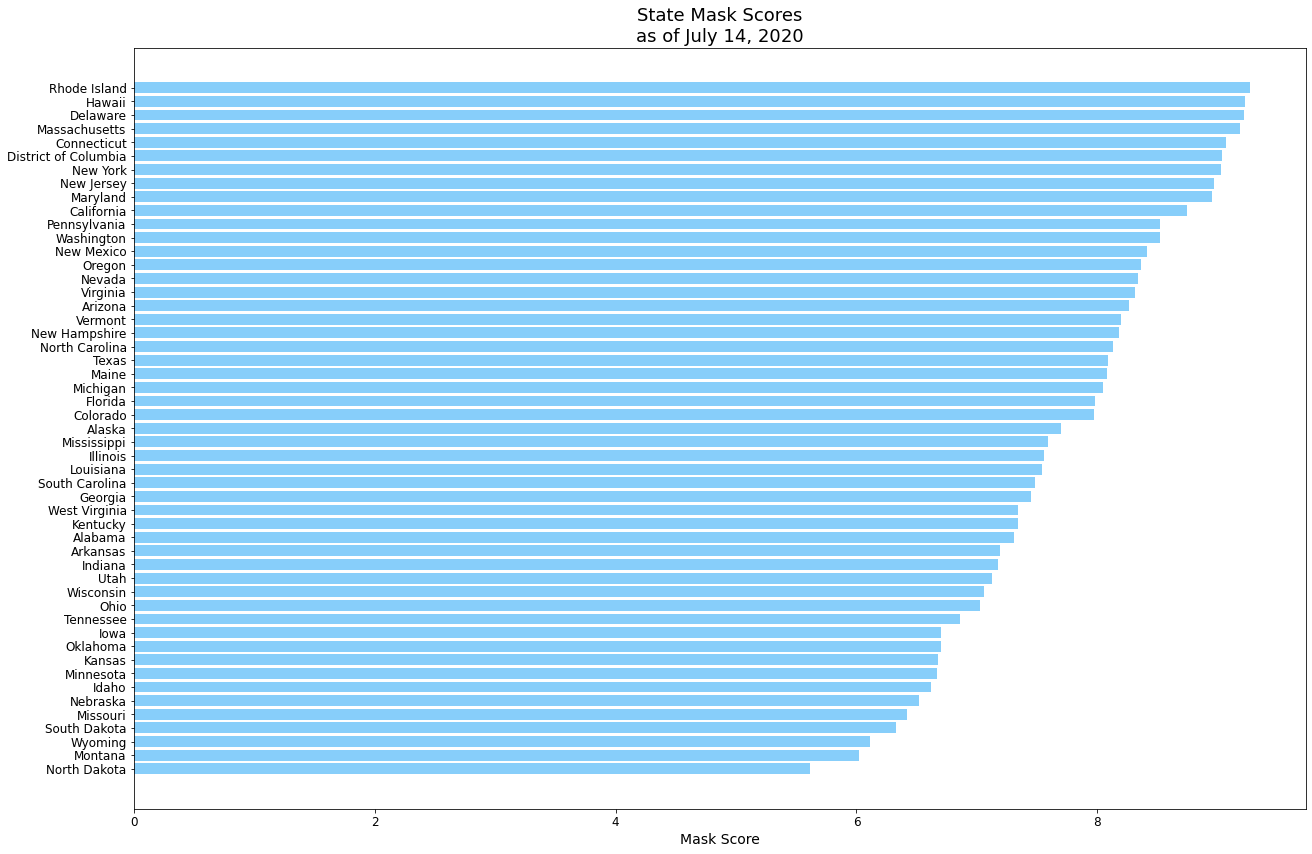

In [90]:
# Generate bar plot showing state mask scores

# Bar plot x and y values
xValues = stateAVG["State"]
yValues = stateAVG["Mask Score"]

# Define bar plot size
fig, ax = plt.subplots(figsize = (21, 14))

# Pass values into bar plot, and define color
ax.barh(xValues, yValues, color = "lightskyblue")

# Define bar plot title, ticks, and x label
ax.set_title("State Mask Scores\nas of July 14, 2020", fontsize = 18)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel("Mask Score", fontsize = 14)

plt.show()

# Visualizations

### U.S. COVID-19 Cases per 100,000 People on July 14, 2020

In [ ]:
# Sort on CaseRate to find lowest case rates per 100,000 people
DataFrame = DataFrame.sort_values("CaseRate", ascending = True)

In [ ]:
# Top 5 counties by case rate per 100,000 people
DataFrame.head()

In [ ]:
# Bottom 5 counties by case rate per 100,000 people
DataFrame.tail()

In [ ]:
# Sort on FIPS to restore order
DataFrame = DataFrame.sort_values("FIPS", ascending = True)
DataFrame

In [ ]:
# Access maps with unique API key
gmaps.configure(api_key = g_key)

In [ ]:
# Create heatmap for CaseRate

# Store latitude and longitude in locations
locations = DataFrame[["Lat", "Lng"]]

# Convert case rates to float
caseRate = DataFrame["CaseRate"].astype(float)

# Plot Heatmap (U.S. geographic center is 39.8333, -98.5855)
fig = gmaps.figure(zoom_level = 4.1, center = (37.8, -98.6), map_type = "ROADMAP")

# Set max intensity to highest case rate found in the dataset
max_intensity = DataFrame["CaseRate"].max()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = caseRate, 
                                 dissipating = False, max_intensity = max_intensity,
                                 point_radius = 0.8, gradient = ["white", "lime", "green", "yellow", "red", "purple"])



# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

# Visualizations

### U.S. COVID-19 Deaths per 100,000 People on July 14, 2020

In [ ]:
# Sort on DeathRate to find lowest death rates per 100,000 people
DataFrame = DataFrame.sort_values("DeathRate", ascending = True)

In [ ]:
# Top 5 counties by death rate per 100,000 people
DataFrame.head()

In [ ]:
# Bottom 5 counties by death rate per 100,000 people
DataFrame.tail()

In [ ]:
# Sort on FIPS to restore order
DataFrame = DataFrame.sort_values("FIPS", ascending = True)
DataFrame

In [ ]:
# Create heatmap for DeathRate

# Store latitude and longitude in locations
locations = DataFrame[["Lat", "Lng"]]

# Convert death rates to float
deathRate = DataFrame["DeathRate"].astype(float)

# Plot Heatmap (U.S. geographic center is 39.8333, -98.5855)
fig = gmaps.figure(zoom_level = 4.1, center = (37.8, -98.6), map_type = "ROADMAP")

# Set max intensity to mean death rate found in the dataset
max_intensity = DataFrame["DeathRate"].max()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = deathRate, 
                                 dissipating = False, max_intensity = max_intensity,
                                 point_radius = 0.8, gradient = ["white", "lime", "green", "yellow", "red", "purple"])

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

# Visualizations

### U.S. Mask Wearing Scores by County on July 14, 2020

In [ ]:
# Sort on CountyScore to find highest mask-wearing scores by county
DataFrame = DataFrame.sort_values("CountyScore", ascending = False)

In [ ]:
# Top 5 counties by mask-wearing score
DataFrame.head()

In [ ]:
# Bottom 5 counties by mask-wearing score
DataFrame.tail()

In [ ]:
# Sort on FIPS to restore order
DataFrame = DataFrame.sort_values("FIPS", ascending = True)
DataFrame

In [ ]:
# Create heatmap for Mask Score

# Store latitude and longitude in locations
locations = DataFrame[["Lat", "Lng"]]

# Convert mask scores to float
mask_score = DataFrame["CountyScore"].astype(float)

# Plot Heatmap (U.S. geographic center is 39.8333, -98.5855)
fig = gmaps.figure(zoom_level = 4.1, center = (37.8, -98.6), map_type = "ROADMAP")

# Set max intensity to max mask score found in the dataset
max_intensity = DataFrame["CountyScore"].max() / 10

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = mask_score, max_intensity = max_intensity, dissipating = False,
                                 point_radius = 0.8, gradient = ["white", "blue", "navy", "purple"])

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

# Visualizations

### U.S. Mask Score vs. Population Density (by County) as of July 14, 2020

In [ ]:
# Do areas of higher population density have higher mask scores?

# Retrieve mask score and population density data
mskScore = DataFrame["CountyScore"]
popDens = DataFrame["PopDens"]
n = len(DataFrame)

# Perform a linear regression on population density versus mask scores
slope, int, r, p, std_err = st.linregress(popDens, mskScore)

# Create equation of line to calculate predicted mask scores
fit = slope * popDens + int

# Create equation in string formats to print on scatter plot
equation = "y = " + str(round(slope, 2)) + "x + " + str(round(int, 2))

# Define scatter plot size
plt.figure(figsize = (21, 14))

# Plot x and y values on scatter plot
plt.scatter(popDens, mskScore, marker = ".", color = "lightskyblue")

# Plot linear regression line on scatter plot
plt.plot(popDens, fit, "--", color = "red")

# Define linear regression line and print on scatter plot
plt.annotate(equation, (5100, 9.5), fontsize = 14, color = "red")

# Define plot title, x and y labels, and gridlines
plt.title(f"Mask Scores vs. Population Density (by County)\nas of July 14, 2020", fontsize = 18)
plt.xlabel("Population Density", fontsize = 14)
plt.ylabel("Mask Score", fontsize = 14)
plt.xlim(0, 6000)
plt.ylim(2.5, 10)
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

print(f"The r-value is: {r}")

plt.show()

# Visualizations

### Case Rate per 100,000 People vs. Population Density (by County) as of July 14, 2020

In [ ]:
# Do areas of higher population density have higher case rates?

# Retrieve mask score and population density data
countyCaseRate = DataFrame["CaseRate"]
popDens = DataFrame["PopDens"]
n = len(DataFrame)

# Perform a linear regression on population density versus mask scores
slope, int, r, p, std_err = st.linregress(popDens, countyCaseRate)

# Create equation of line to calculate predicted mask scores
fit = slope * popDens + int

# Create equation in string formats to print on scatter plot
equation = "y = " + str(round(slope, 2)) + "x + " + str(round(int, 2))

# Define scatter plot size
plt.figure(figsize = (21, 14))

# Plot x and y values on scatter plot
plt.scatter(popDens, countyCaseRate, marker = ".", color = "red")

# Plot linear regression line on scatter plot
plt.plot(popDens, fit, "--", color = "red")

# Define linear regression line and print on scatter plot
plt.annotate(equation, (5100, 500), fontsize = 14, color = "red")

# Define plot title, x and y labels, and gridlines
plt.title(f"COVID-19 Cases vs. Population Density (by County)\nas of July 14, 2020", fontsize = 18)
plt.xlabel("Population Density", fontsize = 14)
plt.ylabel("Cases", fontsize = 14)
plt.xlim(0, 6000)
plt.ylim(0, 7000)
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

print(f"The r-value is: {r}")

plt.show()

# Visualizations

### Death Rate per 100,000 People vs. Population Density (by County) as of July 14, 2020

In [ ]:
# Do areas of higher population density have higher death rates?

# Retrieve mask score and population density data
countyDeathRate = DataFrame["DeathRate"]
popDens = DataFrame["PopDens"]
n = len(DataFrame)

# Perform a linear regression on population density versus mask scores
slope, int, r, p, std_err = st.linregress(popDens, countyDeathRate)

# Create equation of line to calculate predicted mask scores
fit = slope * popDens + int

# Create equation in string formats to print on scatter plot
equation = "y = " + str(round(slope, 2)) + "x + " + str(round(int, 2))

# Define scatter plot size
plt.figure(figsize = (21, 14))

# Plot x and y values on scatter plot
plt.scatter(popDens, countyDeathRate, marker = ".", color = "purple")

# Plot linear regression line on scatter plot
plt.plot(popDens, fit, "--", color = "red")

# Define linear regression line and print on scatter plot
plt.annotate(equation, (5100, 25), fontsize = 14, color = "red")

# Define plot title, x and y labels, and gridlines
plt.title(f"COVID-19 Deaths vs. Population Density (by County)\nas of July 14, 2020", fontsize = 18)
plt.xlabel("Population Density", fontsize = 14)
plt.ylabel("Deaths", fontsize = 14)
plt.xlim(0, 6000)
plt.ylim(0, 350)
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

print(f"The r-value is: {r}")

plt.show()

# Visualizations

### Case Rate per 100,000 People vs. Mask Score (by County) as of July 14, 2020

In [ ]:
# Do counties with higher mask scores have higher case rates per 100,000 people?

# Retrieve mask score and case rate data
countyCaseRate = DataFrame["CaseRate"]
countyMask = DataFrame["CountyScore"]
n = len(DataFrame)

# Perform a linear regression on population density versus mask scores
slope, int, r, p, std_err = st.linregress(countyMask, countyCaseRate)

# Create equation of line to calculate predicted mask scores
fit = slope * countyMask + int

# Create equation in string formats to print on scatter plot
equation = "y = " + str(round(slope, 2)) + "x + " + str(round(int, 2))

# Define scatter plot size
plt.figure(figsize = (21, 14))

# Plot x and y values on scatter plot
plt.scatter(countyMask, countyCaseRate, marker = ".", color = "red")

# Plot linear regression line on scatter plot
plt.plot(countyMask, fit, "--", color = "red")

# Define linear regression line and print on scatter plot
plt.annotate(equation, (3.1, 750), fontsize = 14, color = "red")

# Define plot title, x and y labels, and gridlines
plt.title(f"COVID-19 Cases vs. Mask Wearing Score (by County)\nas of July 14, 2020", fontsize = 18)
plt.xlabel("Mask Score", fontsize = 14)
plt.ylabel("Cases", fontsize = 14)
plt.xlim(2.5, 10)
plt.ylim(0, 3750)
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

print(f"The r-value is: {r}")

plt.show()

# Visualizations

### Death Rate per 100,000 People vs. Mask Score (by County) as of July 14, 2020

In [ ]:
# Do counties with higher mask scores have higher death rates per 100,000 people?

# Retrieve mask score and death rate data
countyDeathRate = DataFrame["DeathRate"]
countyMask = DataFrame["CountyScore"]
n = len(DataFrame)

# Perform a linear regression on population density versus mask scores
slope, int, r, p, std_err = st.linregress(countyMask, countyDeathRate)

# Create equation of line to calculate predicted mask scores
fit = slope * countyMask + int

# Create equation in string formats to print on scatter plot
equation = "y = " + str(round(slope, 2)) + "x + " + str(round(int, 2))

# Define scatter plot size
plt.figure(figsize = (21, 14))

# Plot x and y values on scatter plot
plt.scatter(countyMask, countyDeathRate, marker = ".", color = "purple")

# Plot linear regression line on scatter plot
plt.plot(countyMask, fit, "--", color = "red")

# Define linear regression line and print on scatter plot
plt.annotate(equation, (3.1, 75), fontsize = 14, color = "red")

# Define plot title, x and y labels, and gridlines
plt.title(f"COVID-19 Deaths vs. Mask Wearing Score (by County)\nas of July 14, 2020", fontsize = 18)
plt.xlabel("Mask Score", fontsize = 14)
plt.ylabel("Deaths", fontsize = 14)
plt.xlim(2.5, 10)
plt.ylim(0, 375)
plt.grid(axis = "x", linewidth = 0.5)
plt.grid(axis = "y", linewidth = 0.5)

print(f"The r-value is: {r}")

plt.show()

# Summary

In [ ]:
DataFrame.dtypes

In [ ]:
# Convert values to strings for cleaner formatted display
DataFrame["SQMI"] = DataFrame["SQMI"].map("{:,.2f}".format)
DataFrame["PopEst"] = DataFrame["PopEst"].map("{:,}".format)
DataFrame["PopDens"] = DataFrame["PopDens"].map("{:,.2f}".format)
DataFrame["CaseRate"] = DataFrame["CaseRate"].map("{:,.2f}".format)
DataFrame["DeathRate"] = DataFrame["DeathRate"].map("{:,.2f}".format)
DataFrame["Lat"] = DataFrame["Lat"].map("{:,.4f}".format)
DataFrame["Lng"] = DataFrame["Lng"].map("{:,.4f}".format)
DataFrame["CountyScore"] = DataFrame["CountyScore"].map("{:,.2f}".format)
DataFrame["StateScore"] = DataFrame["StateScore"].map("{:,.2f}".format)
DataFrame

In [ ]:
# Display DataFrame
DataFrame